# Chapter 7 - Multiple Regression II

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.api import het_breuschpagan, anova_lm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import mstats
import numpy as np

DATA_DIR = "../data"
yhat = '\u0177'
square = '\u00b2'

# 7.1 Extra Sums of Squares (p 256)

### Input the Body Fat Data

In [28]:
df = pd.read_pickle(f"{DATA_DIR}/CH07TA01.xz")
df.columns = ['x1', 'x2', 'x3', 'y']
model = ols("y ~ x1 + x2 + x3", data=df).fit()

In [29]:
pd.DataFrame({
    "Triceps": df.x1,
    "Thigh": df.x2,
    "Midarm": df.x3,
    "Body Fat": df.y
})

,Triceps,Thigh,Midarm,Body Fat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9
5,25.6,53.9,23.7,21.7
6,31.4,58.5,27.6,27.1
7,27.9,52.1,30.6,25.4
8,22.1,49.9,23.2,21.3
9,25.5,53.5,24.8,19.3


### Figure 7.2 (p 257)

Regression Results for Several Fitted Models -- Body Fat Example

In [30]:
model1 = ols("y ~ x1", data=df).fit()
model2 = ols("y ~ x2", data=df).fit()
model12 = ols("y ~ x1 + x2", data=df).fit()

In [31]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     44.30
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.02e-06
Time:                        20:19:42   Log-Likelihood:                -48.058
No. Observations:                  20   AIC:                             100.1
Df Residuals:                      18   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4961      3.319     -0.451      0.658      -8.470       5.477
x1             0.8572      0.129      6.656      0.000       0.587       1.128
==============================================================================
Omnibus:                        1.783   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.511
Skew:                          -0.600   Prob(JB):                        0.470
Kurtosis:                       2.389   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     60.62
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.60e-07
Time:                        20:19:42   Log-Likelihood:                -45.733
No. Observations:                  20   AIC:                             95.47
Df Residuals:                      18   BIC:                             97.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.6345      5.657     -4.178      0.001     -35.520     -11.749
x2             0.8565      0.110      7.786      0.000       0.625       1.088
==============================================================================
Omnibus:                        0.461   Durbin-Watson:                   2.500
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.562
Skew:                           0.128   Prob(JB):                        0.755
Kurtosis:                       2.220   Cond. No.                         518.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     29.80
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           2.77e-06
Time:                        20:19:42   Log-Likelihood:                -45.422
No. Observations:                  20   AIC:                             96.84
Df Residuals:                      17   BIC:                             99.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.1742      8.361     -2.293      0.035     -36.814      -1.535
x1             0.2224      0.303      0.733      0.474      -0.418       0.863
x2             0.6594      0.291      2.265      0.037       0.045       1.274
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.843
Skew:                           0.063   Prob(JB):                        0.656
Kurtosis:                       2.002   Cond. No.                         846.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     21.52
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           7.34e-06
Time:                        20:19:42   Log-Likelihood:                -44.312
No. Observations:                  20   AIC:                             96.62
Df Residuals:                      16   BIC:                             100.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.0847     99.782      1.173      0.258     -94.445     328.614
x1             4.3341      3.016      1.437      0.170      -2.059      10.727
x2            -2.8568      2.582     -1.106      0.285      -8.330       2.617
x3            -2.1861      1.595     -1.370      0.190      -5.568       1.196
==============================================================================
Omnibus:                        1.200   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                0.830
Skew:                          -0.085   Prob(JB):                        0.660
Kurtosis:                       2.016   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Table 7.4 (p 262)

ANOVA Table with Decomposition of SSR -- Body Fat Example

In [35]:
display(anova_lm(model1, typ=1))
display(anova_lm(model2, typ=1))
display(anova_lm(model12, typ=1))
display(anova_lm(model, typ=1))

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,352.269797,352.269797,44.304566,0.000003
Residual,18.0,143.119703,7.951095,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
x2,1.0,381.965818,381.965818,60.616836,3.599996e-07
Residual,18.0,113.423682,6.301316,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,352.269797,352.269797,54.466062,0.000001
x2,1.0,33.168913,33.168913,5.128399,0.036899
Residual,17.0,109.950790,6.467694,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,352.269797,352.269797,57.276796,0.000001
x2,1.0,33.168913,33.168913,5.393051,0.033732
x3,1.0,11.545902,11.545902,1.877289,0.189563
Residual,16.0,98.404888,6.150306,NaN,NaN


# 7.2 Uses of Extra Sums of Squares in Tests for Regression Coefficients (p 263)

### Uses of Extra Sums of Squares in Tests for Regression Coefficients (p 264)

Test whether $\beta_{3}=0$, that the midarm circumference ($X_3$) can be dropped from the model

###### Note

The reduced model here is `model12` (`y ~ x1 + x2`) and the full model is `model` (`y ~ x1 + x2 + x3`).

The partial F test here is in the model comparison output and equation (7.15) is provided by

$\frac{SS_{diff}}{DF_{diff}} \div \frac{SSR}{DF_{resid}} = \frac{11.54}{1} \div \frac{98.40}{16} = 1.877$

In [36]:
display(anova_lm(model12, model))
alpha=0.01
print(f"F(0.99; 1; 16) = {round(stats.f.ppf(1-alpha, 1, 16), 4)}")

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,17.0,109.950790,0.0,NaN,NaN,NaN
1,16.0,98.404888,1.0,11.545902,1.877289,0.189563


F(0.99; 1; 16) = 8.531


Test whether $\beta_3=\beta_2=0$

###### Note

Like before, the model comparison provides everything we need for this test, with the full model being compared with the reduced model (`model1`)

$\frac{SS_{diff}}{DF_{diff}} \div \frac{SSR}{DF_{resid}} = \frac{44.71}{2} \div \frac{98.40}{16} = 3.635$

In [37]:
display(anova_lm(model1, model))
alpha=0.05
print(f"F(0.95; 2; 16) = {round(stats.f.ppf(1-alpha, 2, 16), 4)}")

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,143.119703,0.0,NaN,NaN,NaN
1,16.0,98.404888,2.0,44.714815,3.63517,0.04995


F(0.95; 2; 16) = 3.6337


### Coefficients of Partial Determination

This section makes use of all the models defined. Recall that in a [statsmodels](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html) object, the SSR is `model.ess` (explained sum of squares) and the SSE is `model.ssr` (sum of square residuals)

+  model: y ~ x1 + x2 + x3
+  model1: y ~ x1
+  model2: y ~ x2
+  model3: y ~ x1 + x2

From (7.35)

$R^2_{Y1|2}=\frac{SSE(X_2)-SSE(X_1, X_2)}{SSE(X_2)}=\frac{SSR(X_1|X_2)}{SSE(X_2)}=\frac{model2.ssr - model3.ssr}{model2.ssr}$

In this case, the expanded equation in terms of SSE is directly computable with `.ssr` from the respective models. Another way of thinking about it is

$1 - \frac{model3.ssr}{model2.ssr}$

These are presented as percentage reductions below.

##### Note

For signed correlations (p 271), I leave it as an exercise to compute the coefficient sign times the square-root of the coefficient of partial determination. But it's pretty straight-forward math. 

If any statsmodel or stats functions provide these calculations, I'm not aware of them at this time. 

In [38]:
print(f"R2|1 = {round(100 - 100*model12.ssr / model1.ssr, 1)} percent")
print(f"R3|12 = {round(100 - 100*model.ssr / model12.ssr, 1)} percent")
print(f"R1|2 = {round(100 - 100*model12.ssr / model2.ssr, 1)} percent")

R2|1 = 23.2 percent
R3|12 = 10.5 percent
R1|2 = 3.1 percent


# 7.3 Summary of Tests Concerning Regression Coefficients (p 266)

# 7.4 Coefficients of Partial Determination (p 268)

# 7.5 Standardized Multiple Regression Model (p 271)

### Input the Dwaine Studios Data


In [39]:
df = pd.read_pickle(f"{DATA_DIR}/CH06FI05.xz")
df.columns = ['x1', 'x2', 'y']
model = ols("y ~ x1 + x2", data=df).fit()

### Table 7.5 (p 277)

Correlation Transformation and Fitted Standardized Regression Model -- Dwaine Studios Example

##### Note

The stats library contains a [zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) function for computing z-scores (essentially what's being asked in equation 7.44). In this case, we use a degrees of freedom (n-1) correlation. The final result is the same, even though the zscore values computed here don't match the book.

To match the book using DataFrame algebra is straight-forward. The cell below shows the table of those calculations.

In [40]:
df2 = pd.DataFrame(mstats.zscore(df, ddof=1, axis=0))
df2.columns = ["x1", "x2", "y"]
model2 = ols("y ~ 0 + x1 + x2", data=df2).fit()

display(pd.concat([df, df2], axis=1).round(2))
display(model2.summary())

,x1,x2,y,x1,x2,y
0,68.5,16.7,174.4,0.35,-0.46,-0.21
1,45.2,16.8,164.4,-0.90,-0.35,-0.48
2,91.3,18.2,244.2,1.57,1.09,1.72
3,47.8,16.3,154.6,-0.76,-0.87,-0.75
4,46.9,17.3,181.6,-0.81,0.16,-0.01
5,66.1,18.2,207.5,0.22,1.09,0.71
6,49.5,15.9,152.8,-0.67,-1.28,-0.80
7,52.0,17.2,163.2,-0.54,0.06,-0.52
8,48.9,16.6,145.4,-0.70,-0.56,-1.01
9,38.4,16.0,137.2,-1.27,-1.18,-1.24


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              104.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                    5.54e-11
Time:                        20:19:42   Log-Likelihood:                         -3.1838
No. Observations:                  21   AIC:                                      10.37
Df Residuals:                      19   BIC:                                      12.46
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7484      0.106      7.056      0.000       0.526       0.970
x2             0.2511      0.106      2.368      0.029       0.029       0.473
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.722
Skew:                          -0.090   Prob(JB):                        0.697
Kurtosis:                       2.110   Cond. No.                         2.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pd.concat([df, (1/np.sqrt(len(df)-1))*((df - df.mean()) / df.std())], axis=1).round(4)

,x1,x2,y,x1,x2,y
0,68.5,16.7,174.4,0.0778,-0.1021,-0.0464
1,45.2,16.8,164.4,-0.2020,-0.0790,-0.1082
2,91.3,18.2,244.2,0.3516,0.2436,0.3849
3,47.8,16.3,154.6,-0.1708,-0.1942,-0.1687
4,46.9,17.3,181.6,-0.1816,0.0362,-0.0019
5,66.1,18.2,207.5,0.0490,0.2436,0.1581
6,49.5,15.9,152.8,-0.1503,-0.2864,-0.1798
7,52.0,17.2,163.2,-0.1203,0.0132,-0.1156
8,48.9,16.6,145.4,-0.1575,-0.1251,-0.2255
9,38.4,16.0,137.2,-0.2836,-0.2634,-0.2762


##### Note

To revert back to normal values or to manually (and correctly) compute the standard deviation corrected format in the book, you can use numpy with a little TLC. If there are built-in functions for this in `scipy` or `statsmodels`, I'm not aware of them. 

In [42]:
pd.concat([df.mean(), df.std(ddof=1)], axis=1, keys=["means", "std"]).round(4)

,means,std
x1,62.0190,18.6203
x2,17.1429,0.9703
y,181.9048,36.1913


# 7.6 Multicollinearity and Its Effects (p 278)

### Input the Work Crew Productivity Data

In [43]:
df = pd.read_pickle(f"{DATA_DIR}/CH07TA06.xz")
df.columns = ['x1', 'x2', 'y']
model12 = ols("y ~ x1 + x2", data=df).fit()
model1 = ols("y ~ x1", data=df).fit()
model2 = ols("y ~ x2", data=df).fit()

### Table 7.6 (p 279)

Uncorrelated Predictor Variables -- Work Crew Productivity Example

In [44]:
pd.DataFrame({
    "Crew Size": df.x1,
    "Bonus Pay": df.x2,
    "Crew Producitivty": df.y
})

,Crew Size,Bonus Pay,Crew Producitivty
0,4,2,42
1,4,2,39
2,4,3,48
3,4,3,51
4,6,2,49
5,6,2,53
6,6,3,61
7,6,3,60


### Table 7.7 (p 280)

Regression Result when Predicator Variables are Uncorrelated -- Work Crew Productivity Example

##### Note

The model object itself has all the table information. See [references](#References). Below is a dataframe built to organize those details to match. However, all of this information is also available (with some math) in the `anova_lm` DataFrame as well. Both approaches are shown below.

Equations can be shown from the respective `model.summary()`

In [45]:
display(pd.DataFrame({
    "SS": [model12.ess, model12.ssr, model12.centered_tss],
    "DF": [model12.df_model, model12.df_resid, model12.df_model+model12.df_resid],
    "MS": [model12.mse_model, model12.mse_resid, model12.mse_total]
}, index=["Regression", "Error", "Total"]).round(3))

display(pd.DataFrame({
    "SS": [model1.ess, model1.ssr, model1.centered_tss],
    "DF": [model1.df_model, model1.df_resid, model1.df_model+model1.df_resid],
    "MS": [model1.mse_model, model1.mse_resid, model1.mse_total]
}, index=["Regression", "Error", "Total"]).round(3))

display(pd.DataFrame({
    "SS": [model2.ess, model2.ssr, model2.centered_tss],
    "DF": [model2.df_model, model2.df_resid, model2.df_model+model2.df_resid],
    "MS": [model2.mse_model, model2.mse_resid, model2.mse_total]
}, index=["Regression", "Error", "Total"]).round(3))

,SS,DF,MS
Regression,402.250,2.0,201.125
Error,17.625,5.0,3.525
Total,419.875,7.0,59.982


,SS,DF,MS
Regression,231.125,1.0,231.125
Error,188.750,6.0,31.458
Total,419.875,7.0,59.982


,SS,DF,MS
Regression,171.125,1.0,171.125
Error,248.750,6.0,41.458
Total,419.875,7.0,59.982


In [46]:
display(anova_lm(model12))
display(anova_lm(model1))
display(anova_lm(model2))

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,231.125,231.125,65.567376,0.000466
x2,1.0,171.125,171.125,48.546099,0.000937
Residual,5.0,17.625,3.525,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,231.125,231.125000,7.34702,0.035081
Residual,6.0,188.750,31.458333,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
x2,1.0,171.125,171.125000,4.127638,0.08846
Residual,6.0,248.750,41.458333,NaN,NaN


### Back to the Body Fat Data

In [47]:
df = pd.read_pickle(f"{DATA_DIR}/CH07TA01.xz")
df.columns = ['x1', 'x2', 'x3', 'y']
model123 = ols("y ~ x1 + x2 + x3", data=df).fit()
model1 = ols("y ~ x1", data=df).fit()
model2 = ols("y ~ x2", data=df).fit()
model12 = ols("y ~ x1 + x2", data=df).fit()

,x1,x2,x3
x1,1.000,0.924,0.458
x2,0.924,1.000,0.085
x3,0.458,0.085,1.000


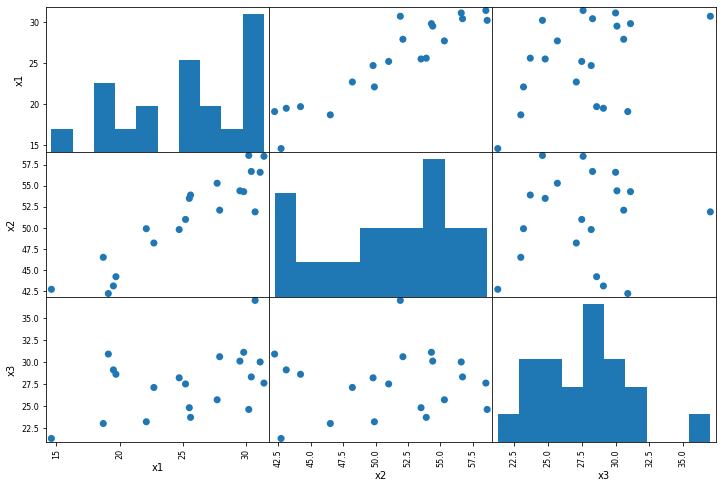

In [48]:
display(df[df.columns[:-1]].corr().round(3))
_ = pd.plotting.scatter_matrix(df[df.columns[:-1]], figsize=(12, 8), s=200, alpha=1)

### Effects on Regression Coefficients (p 284, 286)

Below are the coefficients for $\beta_1$ and $\beta_2$ for each respective model. Included are also the coefficient standard errors and model MSE on page 286. 

In [49]:
pd.DataFrame({
    "b1": [model1.params.get("x1"), model2.params.get("x1"), model12.params.get("x1"), model123.params.get("x1")],
    "b0": [model1.params.get("x2"), model2.params.get("x2"), model12.params.get("x2"), model123.params.get("x2")]
}, index=["X1", "X2", "X1,X2", "X1,X2,X3"]).round(4)

,b1,b0
X1,0.8572,NaN
X2,NaN,0.8565
"X1,X2",0.2224,0.6594
"X1,X2,X3",4.3341,-2.8568


In [50]:
pd.DataFrame({
    "b1": [model1.bse.get("x1"), model2.bse.get("x1"), model12.bse.get("x1"), model123.bse.get("x1")],
    "b0": [model1.bse.get("x2"), model2.bse.get("x2"), model12.bse.get("x2"), model123.bse.get("x2")]
}, index=["X1", "X2", "X1,X2", "X1,X2,X3"]).round(4)

,b1,b0
X1,0.1288,NaN
X2,NaN,0.1100
"X1,X2",0.3034,0.2912
"X1,X2,X3",3.0155,2.5820


In [51]:
pd.DataFrame({
    "MSE": [model1.mse_resid, model2.mse_resid, model12.mse_resid, model123.mse_resid],
}, index=["X1", "X2", "X1,X2", "X1,X2,X3"]).round(2)

,MSE
X1,7.95
X2,6.30
"X1,X2",6.47
"X1,X2,X3",6.15


### Effects on Extra Sums of Squares

Here we look at the extra sum of squares given highly correlated variables. The SSR or X1 by itself is large, but the conditional SSR of X1 when X2 is in the model is small. For calculations, recall

$SSR(X1|X2)=SSE(X2)-SSE(X1,X2)$

The coefficients of partial correlation are also included, demonstrating that the relative explanatory power is dropped significantly for a model with X1 when X2 is already included. 

$R^2_{Y1}=\frac{SSR(X_1)}{SSTO}=\frac{352.27}{495.39}=0.71$

$R^2_{Y1|2}=\frac{SSR(X_1|X_2)}{SSE(X_2)}=\frac{3.47}{113.42}=0.03$

Included are results on p 286, however the calculations do not give the same results. Not sure why. 

In [52]:
pd.DataFrame({
    "Results": [
        model1.ess, 
        model2.ssr - model12.ssr,
        model1.ess/model1.centered_tss,
        1-model12.ssr/model2.ssr,
        model2.ess,
        model1.ssr - model12.ssr
    ]
}, index=["SSR(X1)", "SSR(X1|X2)", "R1", "R1|2", "SSR(X2)", "SSR(X2|X1)"]).round(2)

,Results
SSR(X1),352.27
SSR(X1|X2),3.47
R1,0.71
R1|2,0.03
SSR(X2),381.97
SSR(X2|X1),33.17


# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)